**Import** **Libraries**

In [66]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import numpy as np
import pandas as pd
nltk.download('punkt')
from nltk.corpus import stopwords
from collections import Counter
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
nltk.download(["names",
   "stopwords",
    "state_union",
   "twitter_samples",
    "movie_reviews",
    "averaged_perceptron_tagger",
    "vader_lexicon",
   "punkt","shakespeare"])
import collections
from itertools import chain
from nltk import bigrams
from nltk import trigrams
from collections import OrderedDict


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to /root/nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package 

In [67]:
#words = [w for w in nltk.corpus.state_union.words() if w.isalpha()]
#words

In [68]:
load_meta = "output_meta_yelpHotelData_NRYRcleaned.txt"
load_review = "output_review_yelpHotelData_NRYRcleaned.txt"


In [69]:
ps = PorterStemmer()

**Load** **Data**

In [70]:
file_m = open(load_meta, "r")
text_m = file_m.read()
file_m.close()



file_r = open(load_review, "r")
text_r = file_r.read()
file_r.close()

#text_r = text_r.lower()
text_r = re.sub("^\w ", "", text_r)
words = text_r.split(" ")
final = [[ps.stem(word) for word in sentence.split(" ")] for sentence in words]
stop_words = nltk.corpus.stopwords.words("english")
#stop_words = set(stopwords.words("english")) 
#filtered_sentence = [w for w in final if not w in stop_words] 








In [71]:
words_list = []
for i in range(len(final)):
  words_list.append(final[i][0])

#Words without stopwords
filtered_sentence = []
for w in words_list:
  if w not in stop_words:
    filtered_sentence.append(w)

In [72]:
common_words = Counter(words_list).most_common(1000)

In [73]:
words = ''
for i in range(len(final)):
  words += final[i][0]
  words += ' '

In [74]:
#Bottom 25 words in Dataset

rare_words = Counter(filtered_sentence).most_common(1000)[:-100:-1]
                       

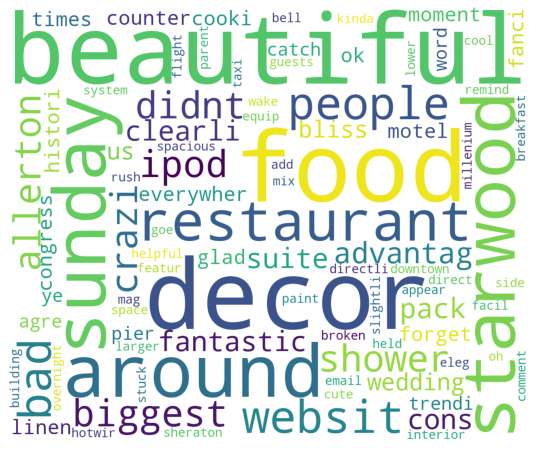

In [75]:
#WordCloud of Bottom 25 words in Dataset
unique = []
for word in rare_words:
    if word not in unique:
        unique.append(word)

unique_from_tuple = [i[0] for i in unique]
#convert list to string and generate
unique_string=(" ").join(unique_from_tuple)
wordcloud = WordCloud(background_color='white', width = 1200, height = 1000, min_font_size = 10).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
#plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
#plt.close()
#wordcloud = WordCloud(background_color='white', width=1200,height=1000,min_font_size = 10).generate(unique)



In [76]:
#Top 1000 words in Dataset
top_words = Counter(filtered_sentence).most_common(10000)





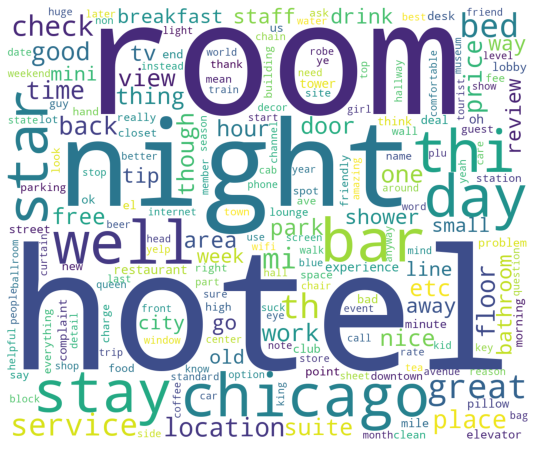

In [77]:
#WordCloud of Top 1000 words in Dataset
unique1 = []
for word in top_words:
    if word not in unique1:
        unique1.append(word)

unique_from_tuple = [i[0] for i in unique1]
#convert list to string and generate
unique_string=(" ").join(unique_from_tuple)
wordcloud = WordCloud(background_color='white', width = 1200, height = 1000, min_font_size = 10).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
#plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
#plt.close()
#wordcloud = WordCloud(background_color='white', width=1200,height=1000,min_font_size = 10).generate(unique)



In [78]:
data_m = pd.read_csv(load_meta, sep=" ", header=None)
data_r = pd.read_csv(load_review, sep="delimiter", header=None, error_bad_lines=False, engine='python')


In [79]:
df = pd.concat([data_r,data_m],axis=1)
df.reset_index(inplace=True)
df.columns = ['Index','Review','0','1','2','3','Bool','4','5','6','7']
df1 = pd.DataFrame(df, columns = ['Index','Review','Bool'])
df1

,Index,Review,Bool
0,0,Let me begin by saying that there are two kind...,N
1,1,The only place inside the Loop that you can st...,N
2,2,I have walked by the Tokyo Hotel countless tim...,N
3,3,"If you are considering staying here, watch thi...",N
4,4,"This place is disgusting, absolutely horrible,...",N
...,...,...,...
5849,5849,"This hotel is amazing! Granted, I worked here,...",Y
5850,5850,Short Version: I am very torn about this place...,Y
5851,5851,Sutton Place is a very elegant hotel. The room...,Y
5852,5852,The only great thing is location. Rest of the ...,Y


In [80]:
#Spam Reviews separated
df2 = df1[df1['Bool'] == 'Y']


In [81]:
wordsdf2 = ' '.join([i for i in df2['Review']]).split()

len(wordsdf2)


105690

In [82]:
#Trigram of words occuring most together in Spam Reviews
stopwords = nltk.corpus.stopwords.words("english")
wordsdf2 = [w for w in wordsdf2 if w.lower() not in stopwords]
Strwordsdf2 = ' '.join([str(elem) for elem in wordsdf2])

#Frequency Distribution
fd = nltk.FreqDist(wordsdf2)
#fd.most_common(3)
fd.tabulate(21)
lower_fd = nltk.FreqDist([w.lower() for w in fd])
lower_fd.tabulate(10)
#Trigram Frequency
finder1 = nltk.collocations.TrigramCollocationFinder.from_words(wordsdf2)
finder1.ngram_fd.most_common(100)
#finder.ngram_fd.tabulate(2)

  hotel    room    stay   would   great   staff  stayed     get      us    like     one   rooms service    nice   place   could    time Chicago    even       -  really 
    823     772     353     299     279     276     247     245     235     233     230     222     219     214     213     195     184     182     178     176     174 
    wifi  believe anything    place    never    rooms    also,      two     room    awful 
       4        3        3        3        3        3        3        3        3        3 


[(('called', 'front', 'desk'), 13),
 (('within', 'walking', 'distance'), 12),
 (('would', 'definitely', 'stay'), 10),
 (('would', 'recommend', 'hotel'), 10),
 (('recommend', 'hotel', 'anyone'), 10),
 (('definitely', 'stay', 'again.'), 9),
 (('front', 'desk', 'staff'), 9),
 (('front', 'desk', 'said'), 9),
 (('would', 'highly', 'recommend'), 7),
 (('made', 'us', 'feel'), 6),
 (('asked', 'front', 'desk'), 5),
 (('ever', 'stayed', 'in.'), 5),
 (('staff', 'friendly', 'helpful.'), 5),
 (("I've", 'ever', 'stayed'), 5),
 (('king', 'size', 'bed'), 5),
 (('got', 'great', 'deal'), 5),
 (('Congress', 'Plaza', 'Hotel'), 5),
 (('call', 'front', 'desk'), 5),
 (('worst', 'hotel', 'experience'), 5),
 (('Hampton', 'Inn', '&'), 5),
 (('Inn', '&', 'Suites'), 5),
 (('stay', 'next', 'time'), 4),
 (('never', 'stay', 'hotel'), 4),
 (('stay', 'hotel', 'again.'), 4),
 (('treated', 'us', 'like'), 4),
 (('4', 'star', 'hotel'), 4),
 (('hotel', "I've", 'ever'), 4),
 (('hotel', 'ever', 'stayed'), 4),
 (('would', 'ne

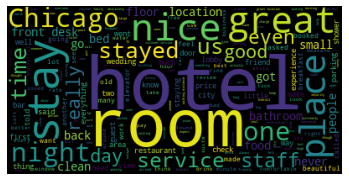

In [83]:
#spam reviews wordcloud

#wordcloud2 = WordCloud().generate(' '.join(df2['Review']))
wordcloud2 = WordCloud().generate(Strwordsdf2)
# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()


In [84]:
df3 = df1[df1['Bool']=='N']


In [85]:
wordsdf3 = ' '.join([i for i in df3['Review']]).split()

len(wordsdf3)


830147

In [86]:
#Trigram of words appearing in Non-spam reviews
stopwords = nltk.corpus.stopwords.words("english")
wordsdf3 = [w for w in wordsdf3 if w.lower() not in stopwords]
Strwordsdf3 = ' '.join([str(elem) for elem in wordsdf3])

#Frequency Distribution
fd1 = nltk.FreqDist(wordsdf3)
#fd.most_common(3)
fd1.tabulate(21)
lower_fd1 = nltk.FreqDist([w.lower() for w in fd1])
lower_fd1.tabulate(10)
#Trigram Frequency
finder = nltk.collocations.TrigramCollocationFinder.from_words(wordsdf3)
finder.ngram_fd.most_common(100)
#finder.ngram_fd.tabulate(2)

    room    hotel        -    would     stay    great     like      get      one    rooms     nice    place   really    staff     good   stayed  service      got location       us  Chicago 
    5714     5244     2554     2378     2373     2322     2251     2249     2083     1944     1840     1741     1717     1590     1466     1460     1417     1368     1331     1301     1293 
  wifi  wifi.   ipod   like   also     el  cons:  pros: that's  wi-fi 
     5      5      5      4      4      4      4      4      4      4 


[(('within', 'walking', 'distance'), 115),
 (('would', 'definitely', 'stay'), 86),
 (('front', 'desk', 'staff'), 81),
 (('definitely', 'stay', 'again.'), 63),
 (('called', 'front', 'desk'), 56),
 (('would', 'stay', 'again.'), 39),
 (('hotel', 'great', 'location'), 35),
 (('would', 'definitely', 'recommend'), 35),
 (('got', 'great', 'deal'), 30),
 (('would', 'highly', 'recommend'), 30),
 (('within', 'walking', 'distance.'), 29),
 (('right', 'across', 'street'), 27),
 (('ordered', 'room', 'service'), 26),
 (("I've", 'ever', 'stayed'), 25),
 (('next', 'time', "I'm"), 25),
 (('staff', 'friendly', 'helpful.'), 24),
 (('king', 'size', 'bed'), 23),
 (('.', '.', '.'), 22),
 (('stay', 'next', 'time'), 22),
 (('Hard', 'Rock', 'Hotel'), 22),
 (('call', 'front', 'desk'), 21),
 (('hotels', "I've", 'stayed'), 20),
 (('would', 'recommend', 'hotel'), 20),
 (("I'm", 'pretty', 'sure'), 19),
 (('get', 'pay', 'for.'), 19),
 (('stayed', 'one', 'night'), 19),
 (('flat', 'screen', 'TV'), 19),
 (('walking', '

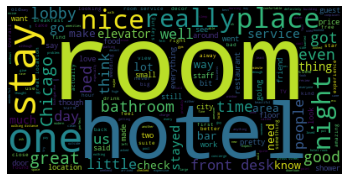

In [87]:
#Non-spam reviews wordcloud

#wordcloud3 = WordCloud().generate(' '.join(df3['Review']))
wordcloud3 = WordCloud().generate(Strwordsdf3)
# Generate plot
plt.imshow(wordcloud3)
plt.axis("off")
plt.show()


In [88]:
from sklearn.feature_extraction.text import CountVectorizer
import plotly.graph_objects as go
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(wordsdf2, 20)
df1 = pd.DataFrame(common_words, columns = ['Review', 'count'])
df1.groupby('Review').sum()['count'].sort_values().iplot(kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in hotel description before removing stop words')